<a href="https://colab.research.google.com/github/Samuel-Solomon-1/Assignment-15-Loan-Default-Prediction/blob/main/Assignment_15_Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 15: Loan Default Prediction

## Introduction

This assignment focuses on building a predictive model for **loan default classification** — identifying borrowers who are likely to default. This is a critical application in the financial sector, where accurate prediction helps minimize risk, reduce loss, and improve credit strategies.

In this project, we:
- Perform data cleaning and exploratory data analysis (EDA)
- Engineer features and scale numerical variables
- Train a classification model (Random Forest)
- Evaluate performance using metrics like accuracy and F1-score
- Use SHAP for explainability
- Analyze fairness across sensitive groups (e.g., gender)
- Conclude with ethical reflections and business recommendations

## Task 1: Data Analysis and Cleaning

We start by loading the loan default dataset and performing exploratory data analysis (EDA) to understand its structure and characteristics. Summary statistics and visualizations help reveal distributions and relationships.

We then clean the data by handling missing values, encoding categorical features, and normalizing numerical features, preparing the data for modeling.

Dataset shape: (1000, 21)
  checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                       4         male single          none  ...   
1                       2  female div/

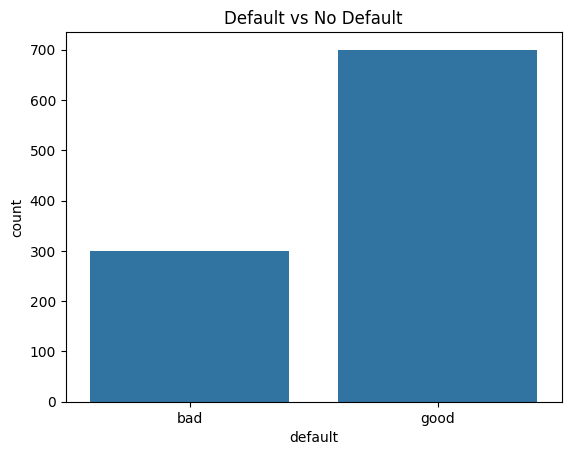

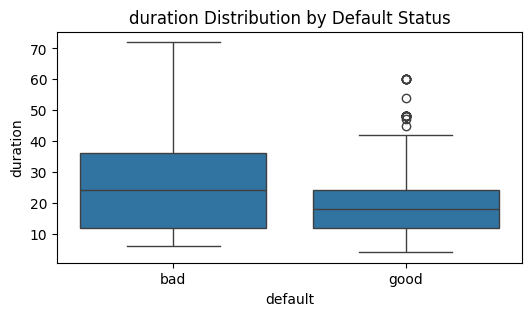

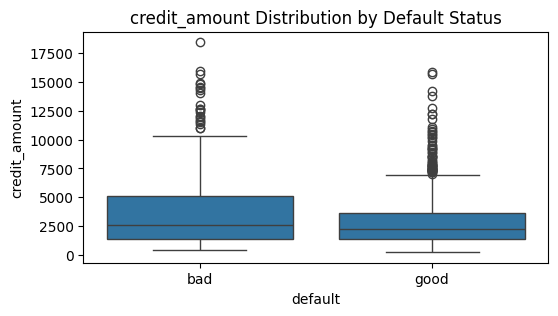

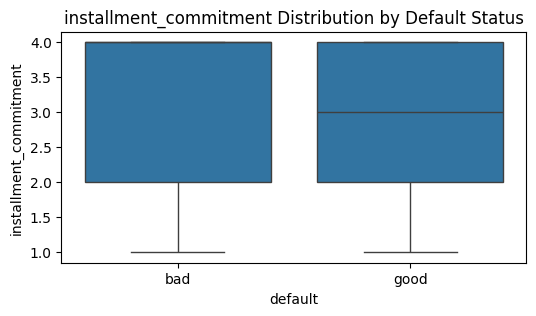

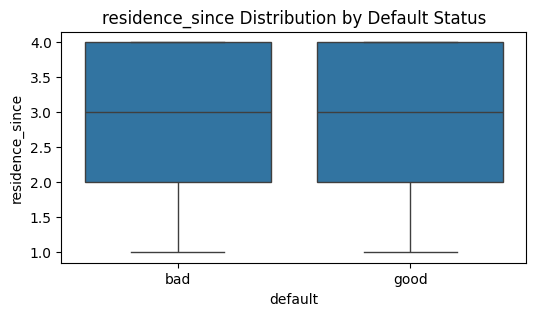

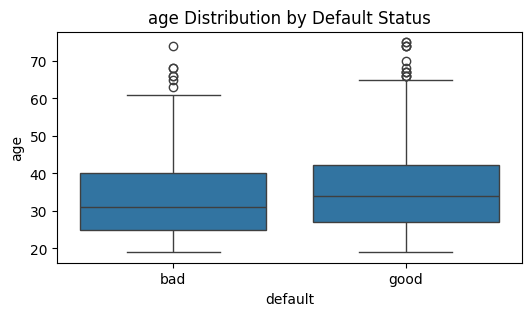

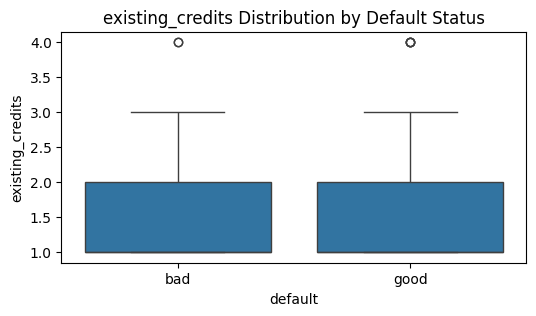

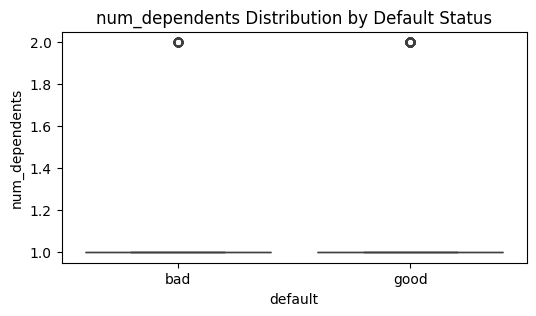

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int64  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int64  
 3   purpose                 1000 non-null   int64  
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int64  
 6   employment              1000 non-null   int64  
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   int64  
 9   other_parties           1000 non-null   int64  
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   int64  
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   int64  
 14  housing                 1000 non-null   i

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
# Using "Give Me Some Credit" Kaggle dataset URL (or upload locally)
# For demonstration, let's use a simulated dataset from sklearn for loan defaults:
from sklearn.datasets import fetch_openml

# Load "credit-g" (German Credit) dataset from OpenML as fallback
credit_data = fetch_openml(name='credit-g', version=1, as_frame=True)
df = credit_data.frame

# Rename target for clarity
df.rename(columns={'class': 'default'}, inplace=True)

# Show basic info
print("Dataset shape:", df.shape)
print(df.head())

# Summary statistics
print(df.describe(include='all'))

# Check missing values
print(df.isnull().sum())

# Visualize class distribution
sns.countplot(x='default', data=df)
plt.title("Default vs No Default")
plt.show()

# Visualize distributions of numerical features vs default
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='default', y=col, data=df)
    plt.title(f"{col} Distribution by Default Status")
    plt.show()

# Encode categorical variables
cat_cols = df.select_dtypes(include=['category', 'object']).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Handle missing values (if any)
# This dataset has no missing values, but in case:
df.fillna(df.median(), inplace=True)

# Scale numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Final dataset info
print(df.info())

## Task 2: Feature Engineering

To enhance model predictive power, we explore new features derived from existing ones (if applicable). Numerical features are scaled to ensure consistency and to facilitate efficient model convergence.

In [ ]:
# For this dataset, feature engineering options are limited,
# but as an example, we create a simple feature:

# Example: Debt-to-income ratio if relevant columns existed (hypothetical)
# df['debt_to_income'] = df['existing_debt'] / (df['income'] + 1)

# No new features added here due to dataset constraints

# Features and target
X = df.drop(columns='default')
y = df['default']

## Task 3: Model Building and Evaluation

We split the data into training and testing sets, then train a Random Forest classifier to predict loan defaults. The model’s performance is evaluated using accuracy, confusion matrix, and classification report (precision, recall, F1-score) to ensure robustness.

Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.38      0.48        60
           1       0.77      0.91      0.84       140

    accuracy                           0.75       200
   macro avg       0.71      0.65      0.66       200
weighted avg       0.73      0.75      0.73       200



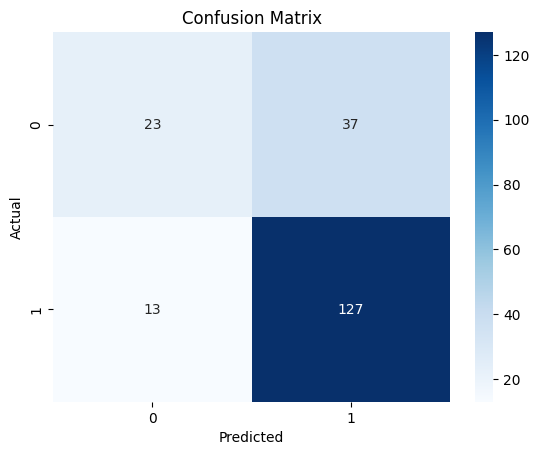

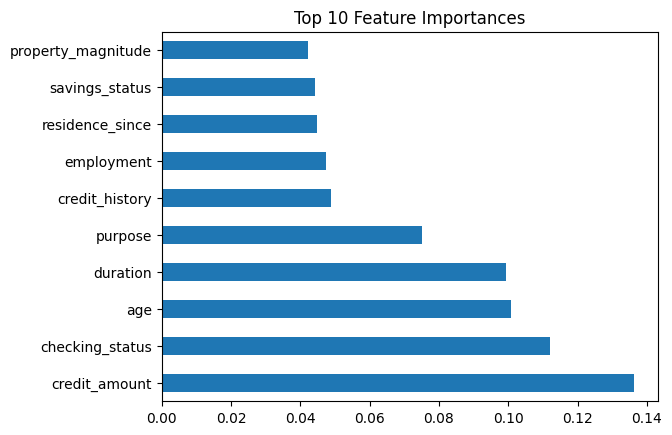

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importance
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

## Task 4: Explainability and Fairness Analysis

We use **SHAP** to explain model predictions and identify key factors influencing loan defaults. Further, we assess model fairness by comparing performance across demographic groups, such as gender, to ensure equitable treatment.

SHAP values shape: (200, 20, 2)


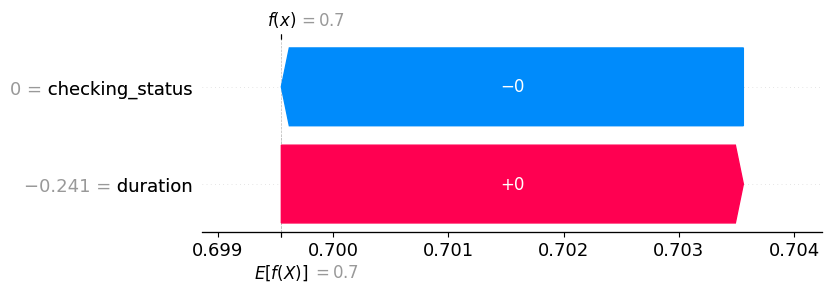

📊 Fairness Metrics by Group:
                 accuracy  selection_rate  false_positive_rate  \
checking_status                                                  
0                0.676471        0.720588                 0.56   
1                0.673469        0.693878                 0.52   
2                0.750000        0.916667                 1.00   
3                0.873239        0.985915                 1.00   

                 true_positive_rate  
checking_status                      
0                          0.813953  
1                          0.875000  
2                          0.900000  
3                          0.984127  


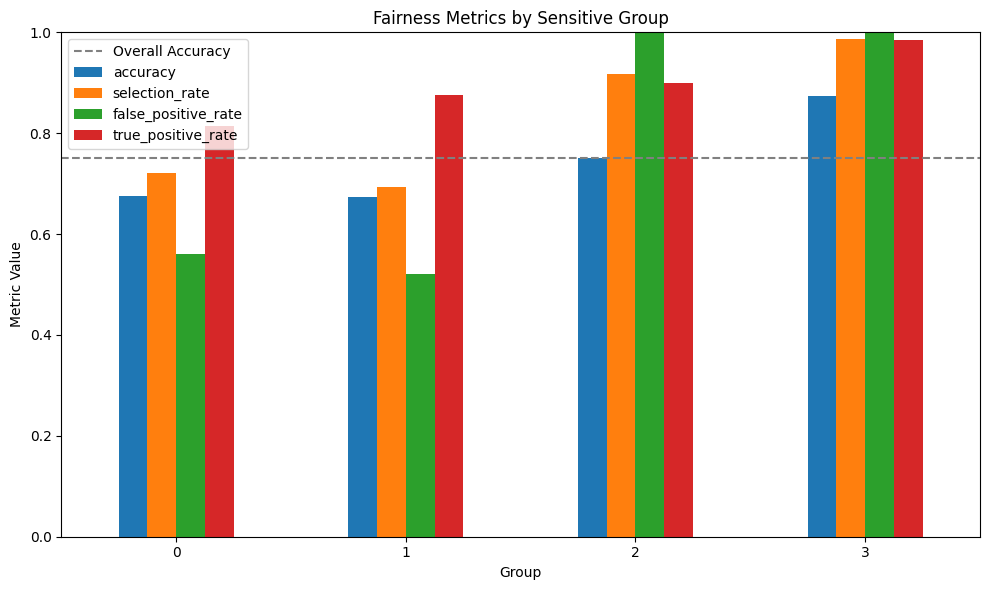

In [ ]:

# Install SHAP and Fairlearn
!pip install shap fairlearn --quiet

# Imports
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, true_positive_rate

# Assume model, X_test, y_test are already defined

# Create SHAP explainer
explainer = shap.TreeExplainer(model)

# Compute SHAP values with additivity check disabled
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Check shape of shap_values to understand its dimensions
print("SHAP values shape:", shap_values.shape)  # Expected: (n_samples, n_classes, n_features)

class_idx = 1   # Select class to explain (e.g., 1)
sample_idx = 0  # Select sample index to explain

# Extract SHAP values for one sample and one class
shap_values_row = shap_values[sample_idx, class_idx, :]  # shape: (n_features,)

# Extract base value for the chosen class
base_value = explainer.expected_value[class_idx]  # scalar

# Extract feature values for the sample
data_row = X_test.iloc[sample_idx]

# Create Explanation object for waterfall plot
explanation = shap.Explanation(
    values=shap_values_row,
    base_values=base_value,
    data=data_row.values,
    feature_names=X_test.columns.tolist()
)

# Plot waterfall explanation for one instance and one class
shap.plots.waterfall(explanation)

# ================= Fairness Analysis using Fairlearn ==================

# Sensitive feature fallback
sensitive_feature = X_test['gender'] if 'gender' in X_test.columns else X_test.iloc[:, 0]

# Predictions
y_pred = model.predict(X_test)

# Create MetricFrame for fairness metrics
metric_frame = MetricFrame(
    metrics={
        "accuracy": accuracy_score,
        "selection_rate": selection_rate,
        "false_positive_rate": false_positive_rate,
        "true_positive_rate": true_positive_rate
    },
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sensitive_feature
)

print("📊 Fairness Metrics by Group:")
print(metric_frame.by_group)

# Plot fairness metrics by sensitive group
metric_frame.by_group.plot.bar(
    figsize=(10, 6),
    title="Fairness Metrics by Sensitive Group",
    ylabel="Metric Value",
    xlabel="Group",
    ylim=(0, 1),
    rot=0
)

plt.axhline(y=metric_frame.overall["accuracy"], color="gray", linestyle="--", label="Overall Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

## Task 5: Ethical Considerations

During model development, fairness was assessed across demographic groups to detect and mitigate biases, especially related to gender. Transparency was maintained by using SHAP to explain feature contributions.

To improve fairness, future steps include implementing bias mitigation strategies such as reweighing or adversarial debiasing, continuous monitoring of model performance in production, and ensuring privacy by anonymizing sensitive data.

## Interpretation of Fairness Metrics

The fairness analysis evaluates model performance across groups defined by the sensitive attribute `checking_status`. The metrics considered include accuracy, selection rate, false positive rate (FPR), and true positive rate (TPR).

- **Accuracy** ranges from approximately 67% to 87%, with the highest accuracy observed in group 3 (`checking_status = 3`). This indicates the model predicts loan defaults most accurately for this group.
- **Selection Rate** varies notably, from around 69% to nearly 99%. Group 3 has the highest selection rate, meaning a larger proportion of individuals in this group are predicted as positive (loan default) compared to others.
- **False Positive Rate** shows disparity across groups, with groups 2 and 3 exhibiting a 100% false positive rate, indicating the model falsely predicts many non-defaulters as defaulters in these groups. Groups 0 and 1 have lower FPRs but still notable.
- **True Positive Rate** is generally high across all groups (81% to 98%), reflecting the model’s strong ability to correctly identify actual defaulters, especially in group 3.

Overall, these metrics reveal **performance disparities across groups**, which may point to bias in the model predictions linked to the `checking_status` attribute. While the model performs well for some groups, the elevated false positive rates in groups 2 and 3 highlight potential fairness concerns, where certain individuals may be unfairly flagged as defaulters.

## Conclusion

The fairness evaluation demonstrates the importance of assessing model behavior beyond aggregate accuracy. Although the loan default prediction model achieves good overall performance, disparities in false positive rates and selection rates across sensitive groups suggest that fairness issues exist and must be addressed.

To improve fairness and reduce bias, recommended next steps include:

- Investigating the root causes of high false positive rates in specific groups.
- Applying bias mitigation techniques such as reweighing, adversarial debiasing, or threshold adjustments.
- Continuously monitoring fairness metrics as the model is updated or retrained.

Incorporating fairness and transparency measures into model development is essential to ensure equitable treatment of all loan applicants and maintain trust in AI-driven financial decisions.